In [ ]:
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
df = pd.read_csv('C:\\Users\\Haine\\OneDrive\\Escritorio\\Proyecto_2\\bank_cleaned.csv')

In [ ]:
import pandas as pd

# 1- Revisión general del dataset

df.shape               # Tamaño del dataset (filas, columnas)
df.info()              # Tipos de datos y valores nulos
df.head()              # Primeras filas
df.describe()          # Estadísticas para columnas numéricas
df.describe(include='object')  # Estadísticas para columnas categóricas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       40841 non-null  int64  
 1   age              40841 non-null  int64  
 2   job              40841 non-null  object 
 3   marital          40841 non-null  object 
 4   education        40841 non-null  object 
 5   default          40841 non-null  object 
 6   balance          40841 non-null  int64  
 7   housing          40841 non-null  object 
 8   loan             40841 non-null  object 
 9   day              40841 non-null  int64  
 10  month            40841 non-null  object 
 11  duration         40841 non-null  float64
 12  campaign         40841 non-null  int64  
 13  pdays            40841 non-null  int64  
 14  previous         40841 non-null  int64  
 15  poutcome         40841 non-null  object 
 16  response         40841 non-null  object 
 17  response_bin

,job,marital,education,default,housing,loan,month,poutcome,response
count,40841,40841,40841,40841,40841,40841,40841,40841,40841
unique,12,3,3,2,2,2,12,3,2
top,blue-collar,married,secondary,no,yes,no,may,unknown,no
freq,8805,24641,21933,40078,22820,34042,12496,34802,36202


In [ ]:
# 2- Valores faltantes y duplicados

df.isnull().sum()      # Conteo de valores nulos por columna
df.duplicated().sum()  # Número de filas duplicadas


np.int64(0)

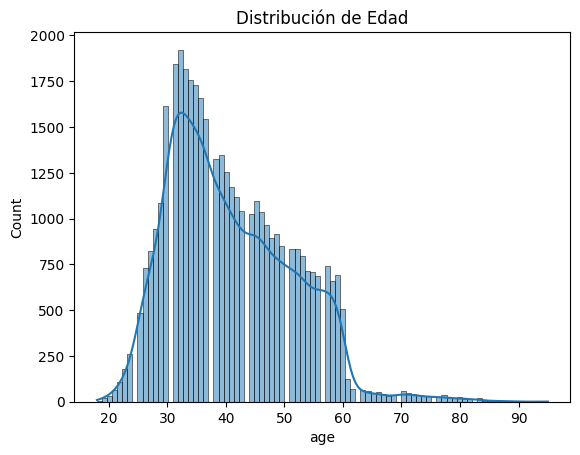

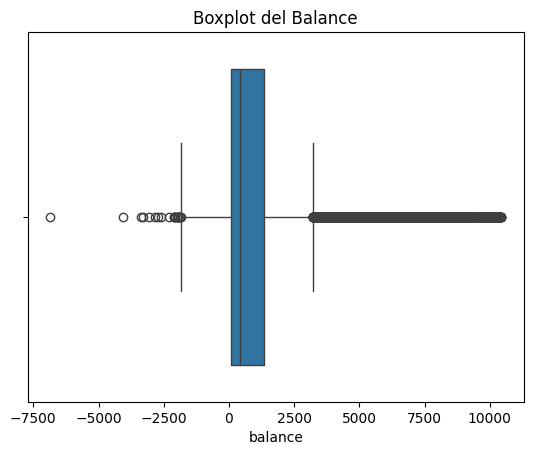

In [ ]:
# 3- Distribuciones y conteos #

#_Numéricas_

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['age'], kde=True)
plt.title("Distribución de Edad")
plt.show()

sns.boxplot(x=df['balance'])
plt.title("Boxplot del Balance")
plt.show()


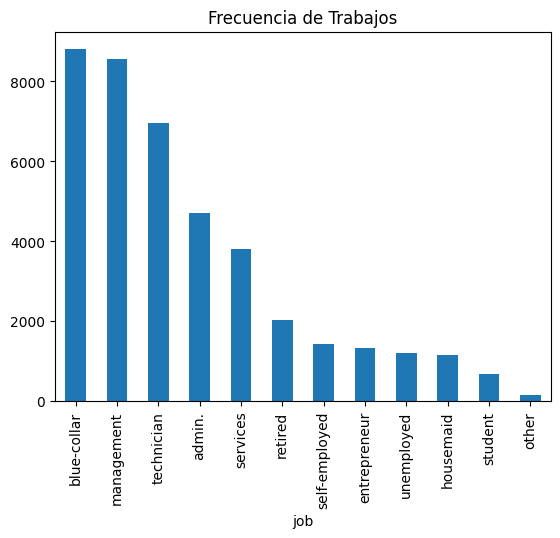

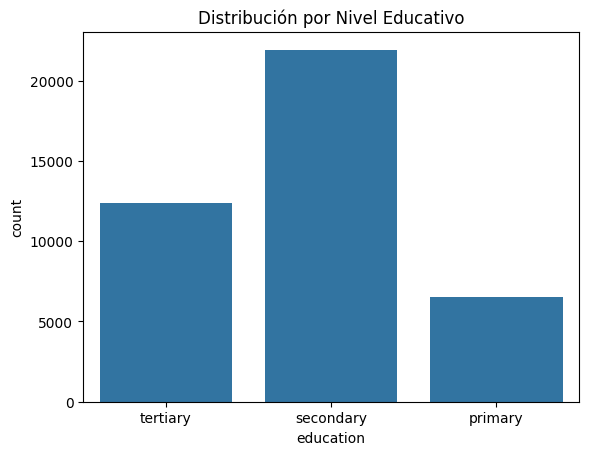

In [ ]:
# 3- Distribuciones y conteos #

#_Categóricas_

df['job'].value_counts().plot(kind='bar')
plt.title("Frecuencia de Trabajos")
plt.show()

sns.countplot(x='education', data=df)
plt.title("Distribución por Nivel Educativo")
plt.show()


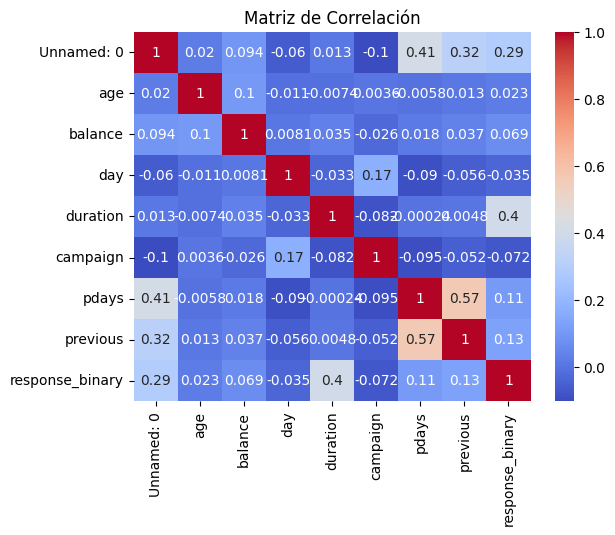

In [ ]:
# 4- Relaciones entre variables #

#_Correlaciones numéricas_

correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


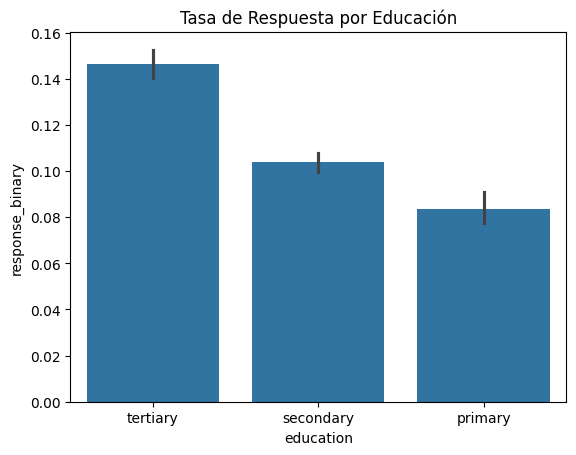

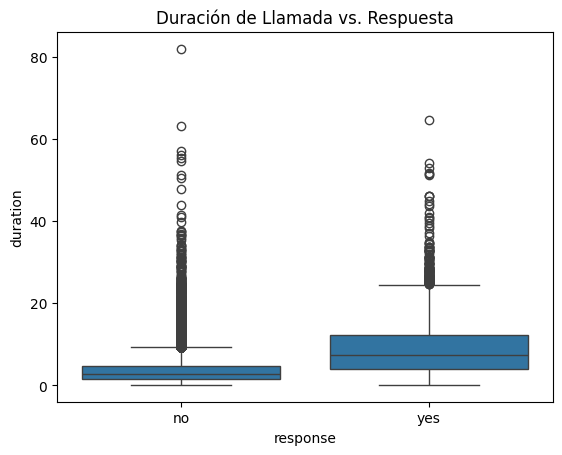

In [ ]:
# 4- Relación entre variables #

#_Categóricas vs. Target_

sns.barplot(x='education', y='response_binary', data=df)
plt.title("Tasa de Respuesta por Educación")
plt.show()

sns.boxplot(x='response', y='duration', data=df)
plt.title("Duración de Llamada vs. Respuesta")
plt.show()


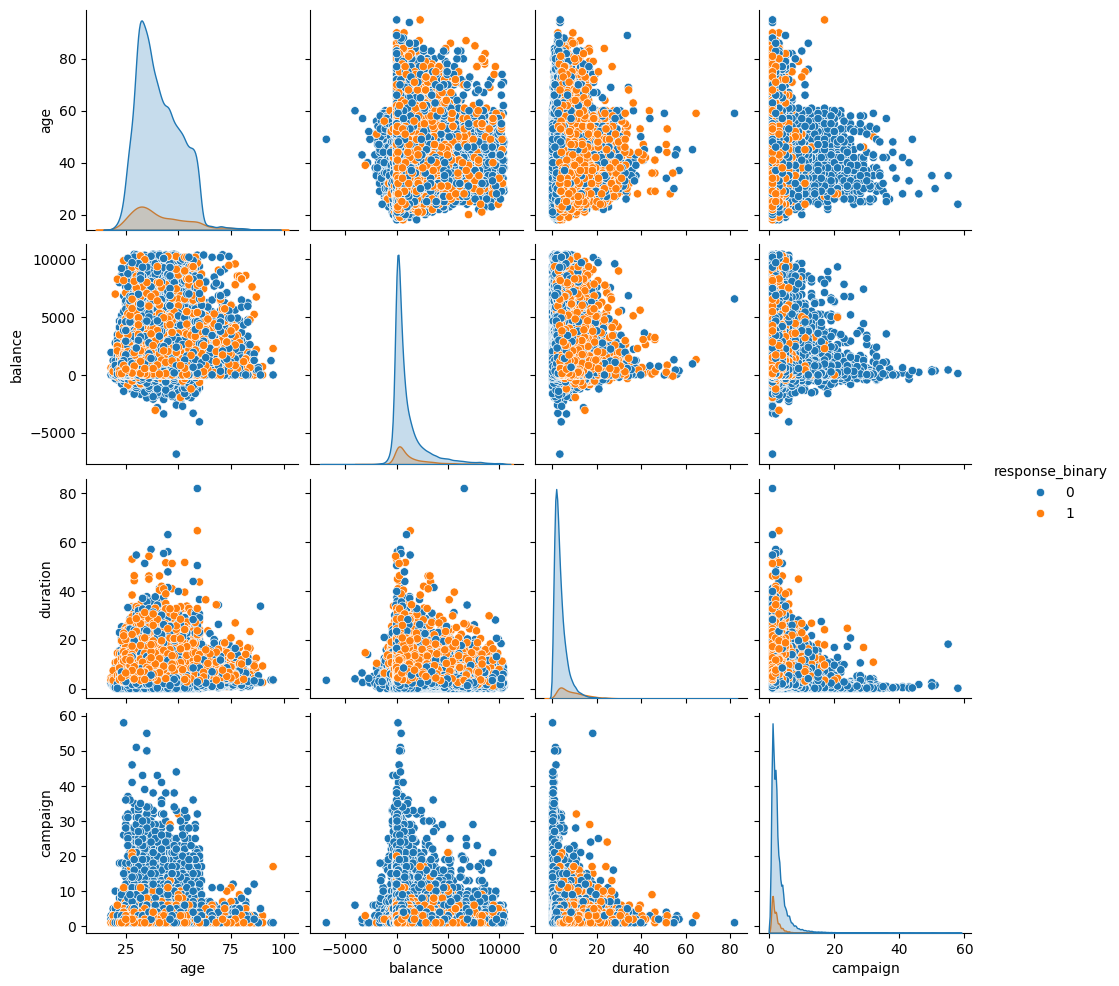

In [ ]:
# 5- Relaciones multivariantes #

sns.pairplot(df[['age', 'balance', 'duration', 'campaign', 'response_binary']], hue='response_binary')
plt.show()


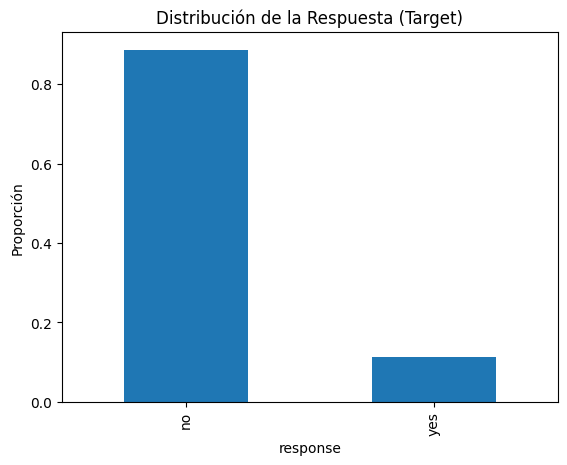

In [ ]:
# 6- Análisis de la variable objetivo

df['response'].value_counts(normalize=True).plot(kind='bar')
plt.title("Distribución de la Respuesta (Target)")
plt.ylabel("Proporción")
plt.show()


In [ ]:
# Resumen grupos:

df.groupby('job')['response_binary'].mean().sort_values(ascending=False)



job
student          0.294630
retired          0.221782
unemployed       0.156766
management       0.131349
admin.           0.119660
self-employed    0.112266
technician       0.108427
other            0.094937
housemaid        0.087903
services         0.087345
entrepreneur     0.081343
blue-collar      0.072345
Name: response_binary, dtype: float64

In [ ]:
pd.crosstab(df['education'], df['response'])


response,no,yes
education,,
primary,5981,547
secondary,19654,2279
tertiary,10567,1813


In [ ]:
#_Revisión general del dataset -Estructura- , -Tipos de datos-, -Estadísticas-.  
# Visualización de:
        # Distribuciones y boxplots de variables numéricas.
        # Conteo y análisis de categorías.
        # Tasa de respuesta por categoría.
        # Matriz de correlación.
        # Relación entre variables numéricas y la respuesta.


# ✅ Conclusiones
- `duration` es la variable más predictiva del comportamiento de respuesta.
- Algunos grupos como estudiantes y jubilados responden más frecuentemente.
- El modelo de regresión logística puede mejorarse con estrategias de balanceo de clases.

**Fin del análisis.**